# Lab 1 - BCC406/PCC177

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Regressão Linear

### Prof. Eduardo e Prof. Pedro

Objetivos:

- Uso de *NumPy*.
- Regressão e Descida do Gradiente

Data da entrega : 13/10

- Complete o código (marcado com 'ToDo') e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-LabX.pdf"
- Envie o PDF via google [FORM](https://forms.gle/ouR94ZKxabwGNced8)
- Envie o *.ipynb* também.

Sugestão de leitura:

- Ler [Capítulo 2 do livro texto](https://pt.d2l.ai/chapter_preliminaries/index.html). Dê ênfase para as seções 2.3 e 2.4. **Sugerimos fortemente** abrir com o Colab e executar estas duas seções passo a passo.
- Ler [Capítulo 3 do livro texto](https://pt.d2l.ai/chapter_linear-networks/index.html).
- Leitura alternativa para quem está com pouco tempo: Capítulos 1.1, 1.2, 3.1 e 3.3 do livreto [The Little Book
of Deep Learning](https://fleuret.org/public/lbdl.pdf) de François Fleuret.


## ***NumPy*** (20pt)

*NumPy* é uma das bibliotecas mais populares para computação científica. Ela foi desenvolvida para dar suporte a operações com *arrays* de *N* dimensões e implementa métodos úteis para operações de álgebra linear, geração de números aleatórios, etc.

### Criando arrays

In [21]:
# Primeiramente, vamos importar a biblioteca
import numpy as np

In [22]:
# Usaremos a função zeros para criar um array de uma dimensão de tamanho 5
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [23]:
# Da mesma forma, para criar um array de duas dimensões:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### ToDo: Vocabulário comum (4pt)

* Em *NumPy*, cada dimensão é chamada eixo (***axis***).
* Um array é uma lista de axis e uma lista de tamanho dos axis é o que chamamos de **shape** do array.
    * Por exemplo, o shape da matrix acima é `(3, 4)`.
    
* O tamanho (***size***) de uma array é o número total de elementos, por exemplo, no array 2D acima = `3 * 4 = 12`.

In [24]:
a = np.zeros((3,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
a.shape

(3, 4)

In [26]:
a.ndim

2

In [27]:
a.size

12

In [28]:
# ToDo : Criar um array de 3 dimensões, de shape (2,3,4) e repetir as operações acima
c = np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [29]:
c.shape

(2, 3, 4)

In [30]:
c.ndim

3

In [31]:
c.size

24

In [32]:
# ToDo : repita as operações acima trocando a função zeros por : ones, full, empty
c=np.ones(shape=(2,3,4))
c

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [33]:
c = np.full((2,3,4),1)
c

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]])

In [34]:
c = np.empty(shape=(2,3,4), dtype = int)
c

array([[[4607182418800017408, 4607182418800017408, 4607182418800017408,
         4607182418800017408],
        [4607182418800017408, 4607182418800017408, 4607182418800017408,
         4607182418800017408],
        [4607182418800017408, 4607182418800017408, 4607182418800017408,
         4607182418800017408]],

       [[4607182418800017408, 4607182418800017408, 4607182418800017408,
         4607182418800017408],
        [4607182418800017408, 4607182418800017408, 4607182418800017408,
         4607182418800017408],
        [4607182418800017408, 4607182418800017408, 4607182418800017408,
         4607182418800017408]]])

### ToDo: ***np.arange*** (2pt)

Você pode criar um array usando a função arange, similar a função range do Python.

In [35]:
# Criando um array
np.arange(1, 5)

array([1, 2, 3, 4])

In [36]:
# Para criar com ponto flutuante
np.arange(1.0, 5.0)

array([1., 2., 3., 4.])

In [37]:
# ToDo : crie um array com arange, variando de 1 a 5, com um passo de 0.5
np.arange(1.0,5.0,0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

### ***np.rand*** e ***np.randn***

O *NumPy* tem várias funções para criação de números aleatórios. Estas funções são muito úteis para inicialização dos pesos das redes neurais. Por exemplo, abaixo criamos uma matrix `(3, 4)` inicializada com números em ponto flutuante (*floats*) e distribuição uniforme:

In [38]:
np.random.rand(3,4)

array([[0.4663823 , 0.80135968, 0.79300801, 0.9085522 ],
       [0.20525777, 0.69681279, 0.77917984, 0.9619319 ],
       [0.45619835, 0.96855523, 0.35860354, 0.01551271]])

Abaixo um matriz inicializada com distribuição gaussiana ([normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)) com média 0 e variância 1

In [39]:
np.random.randn(3,4)

array([[-0.92891701,  2.1704582 ,  0.09796656,  0.45666804],
       [-0.96950331, -1.35364905,  0.94834369, -0.13816063],
       [ 0.29904474, -0.84090129, -1.96973994,  1.28251529]])

### ToDo: *MatplotLib* (4pt)

Vamos usar a biblioteca matplotlib (para mais detalhes veja o [tutorial de *matplotlib*](https://drive.google.com/file/d/1f3Y_gm-URBVov5wIOs-JrdNw0gK86EXL/view?usp=sharing)) para plotar dois arrays de tamanho 10.000, um inicializado com distribuição normal e o outro com uniforme

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
array_a = np.random.rand(1000) # ToDo : criar um array de tamanho 10.000
array_b = np.random.rand(1000) # ToDo : criar um array de tamanho 10.000

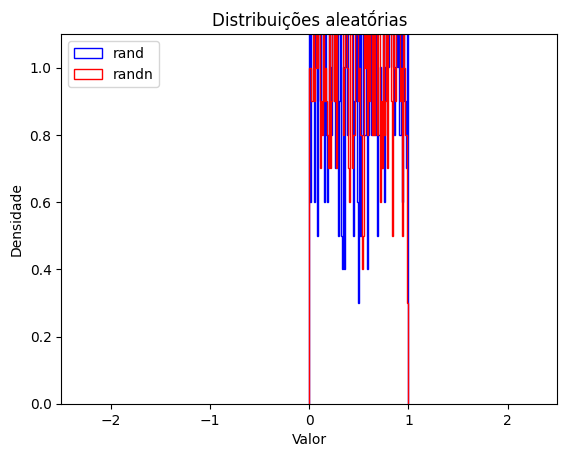

In [42]:
plt.hist(array_a, density=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(array_b, density=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Distribuições aleatṍrias")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.show()

### Tipo de dados (***dtype***)

Você pode ver qual o tipo de dado pelo atributo `dtype`. Verifique abaixo:

In [43]:
c = np.arange(1, 5)
print(c.dtype, c)

int64 [1 2 3 4]


In [44]:
c = np.arange(1.0, 5.0)
print(c.dtype, c)

float64 [1. 2. 3. 4.]


Tipos disponĩveis: `int8`, `int16`, `int32`, `int64`, `uint8`|`16`|`32`|`64`, `float16`|`32`|`64` e `complex64`|`128`. Veja a [documentação](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) para a lista completa.


### ***itemsize***

O atributo `itemsize` retorna o tamanho em bytes

In [45]:
e = np.arange(1, 5, dtype=np.complex64)
e.itemsize

8

In [47]:
# Na memória, um array ẽ armazenado de forma contígua
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)
f.data

### ToDo: ***Reshaping*** (8pt)

Alterar o shape de uma array é muto fácil com NumPy e muito útil para adequação das matrizes para métodos de machine learning. Contudo, o tamanho (size) não pode ser alterado.

In [46]:
# O núemro de dimensões também é chamado de rank
g = np.arange(24)
print(g)
print("Rank:", g.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1


In [48]:
g.shape = (6, 4)
print(g)
print("Rank:", g.ndim)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2


In [49]:
g.shape = (2, 3, 4)
print(g)
print("Rank:", g.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3


Mudando o formato do dado (***reshape***)

In [50]:
g2 = g.reshape(4,6)
print(g2)
print("Rank:", g2.ndim)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2


In [51]:
# Pode-se alterar diretamente um item da matriz, pelo índice
g2[1, 2] = 999
g2

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23]])

Repare que o objeto `'g'` foi modificado também!

In [52]:
g

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [999,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

Todas a operçãoes aritméticas comuns podem ser feitas com o *ndarray*

In [53]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


Repare que a multiplicação acima **NÃO** é um multiplicação de martizes

Arrays devem ter o mesmo shape, caso contrário, NumPy vai aplicar a regra de *broadcasting* (Ver seção 2.1.3 do [livro texto](http://d2l.ai/chapter_preliminaries/ndarray.html)). Pesquise sobre a operação ed bradcasting do NumPy e explique com suas palavras, abaixo:

In [54]:
# ToDO: Explique aqui o conceito de broadcasting
#Esse mecanismo funciona da seguinte maneira: Primeiro, expanda um ou ambos os arrays
#copiando elementos de forma adequada de modo que após esta transformação, os dois tensores
#têm a mesma forma.Em segundo lugar, execute as operações elemento a elemento nas matrizes resultantes.
#
#
#

### Iteração de arrays de *NumPy*

Repare que você pode iterar pelos `ndarrays`. Repare que a iteração é feita pelos *axis*.

In [55]:
c = np.arange(24).reshape(2, 3, 4)  # Um array 3D (coposto de duas matrizes de 3x4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [56]:
for m in c:
    print("Item:")
    print(m)

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [57]:
for i in range(len(c)):  # Observe que len(c) == c.shape[0]
    print("Item:")
    print(c[i])

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [58]:
# Para iterar por todos os elementos
for i in c.flat:
    print("Item:", i)

Item: 0
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 6
Item: 7
Item: 8
Item: 9
Item: 10
Item: 11
Item: 12
Item: 13
Item: 14
Item: 15
Item: 16
Item: 17
Item: 18
Item: 19
Item: 20
Item: 21
Item: 22
Item: 23


### Concatenando arrays

In [59]:
# Pode-se concatenar arrays pelos axis
q1 = np.full((3,4), 1.0)

q2 = np.full((4,4), 2.0)

q3 = np.full((3,4), 3.0)

q = np.concatenate((q1, q2, q3), axis=0)

q

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

### ToDo: Transposta (2pt)


In [60]:
m1 = np.arange(10).reshape(2,5)
m1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [61]:
# ToDo : imprima a matriz transposta de m1
m1 = np.arange(10).reshape(2,5)
m1.T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

### Produto de matrizes

In [62]:
n1 = np.arange(10).reshape(2, 5)
n1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [63]:
n2 = np.arange(15).reshape(5,3)
n2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [64]:
n1.dot(n2)

array([[ 90, 100, 110],
       [240, 275, 310]])

### Matriz Inversa

In [65]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])

m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [66]:
linalg.inv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

### Matriz identidade

In [67]:
m3.dot(linalg.inv(m3))

array([[ 1.00000000e+00, -1.66533454e-16,  0.00000000e+00],
       [ 6.31439345e-16,  1.00000000e+00, -1.38777878e-16],
       [ 5.21110932e-15, -2.38697950e-15,  1.00000000e+00]])

# Regressão Linear e Descida do Gradiente (80pt)

Usaremos algoritmos da biblioteca [*Scikit-learn*](https://scikit-learn.org/stable/) para aplicar aprendizagem de máquina e resolver um problema popular de regressão. Nosso foco será em regressão linear e otimização com descida do gradiente. Para essa prática, implementaremos nosso próprio método baseado em descida do gradiente e compararemos com estratégias fornecidas pelo *scikit learn* .

Vamos aplicar em um problema de predição de preços de casas (**California Housing Dataset**)

O California Housing Dataset é um conjunto de dados amplamente utilizado em aprendizado de máquina para prever os preços medianos das habitações em distritos da Califórnia com base em uma série de características, como a renda mediana, idade mediana da habitação, número total de quartos, população, entre outros. Originalmente, este conjunto de dados foi derivado do censo de 1990 da Califórnia e tem sido usado como um exemplo padrão em muitos livros e cursos para ilustrar técnicas de regressão e outras análises preditivas. O objetivo principal é construir um modelo que possa prever o preço mediano da habitação em um determinado distrito, dadas certas características desse distrito.



## Processamento dos dados (10pt)

### Importando as bibliotecas

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

np.random.seed(150794)

A biblioteca [*Scikit-learn*](https://scikit-learn.org/stable/) é focada em aprendizagem de máquina e fornece diversos métodos de classificação, extração de características, etc. Ela também fornece algumas bases de dados clássicas, por meio de objetos do Pandas.

**Se você não conhece o pacote Pandas, veja este [curso rápido](https://www.kaggle.com/learn/pandas).**

### Carregando os dados

In [69]:
housing_data = fetch_california_housing()

Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])

df = Features.join(Target)

### Entendendo os dados

Vamos usar apenas uma característica, renda média (MedInc), como variável independente ($x_i$) e o preço final como variável dependente ($y_i$).

In [70]:
df[['MedInc', 'Target']].describe()

,MedInc,Target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


**Resultado esperado (não precisa ser idêntico)**

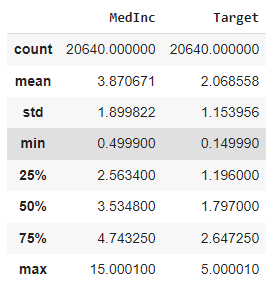

### Pré-processamento

#### Removendo outlier

Perceba que em 75% dos dados, a renda média (MedInc) é menor que 5 e que o valor da casa (Target) é menor que 3. Vamos remover rendas maiores que 5 e casas com preço maior que 3, para evitar valores espúrios e outliers.

In [71]:
df = df[df.MedInc < 5]
df = df[df.Target < 3]

#### Normalização

Também vamos deixar as duas variáveis na faixa entre 0 e 1

In [72]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

X = scale(df.MedInc)
y = scale(df.Target)

In [ ]:
#conferindo o valor máximo
X.max(), y.max()

(1.0, 1.0)

Valor esperado: (1.0, 1.0)

#### Plotando os dados

<ipython-input-73-1b2042c6d9a8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


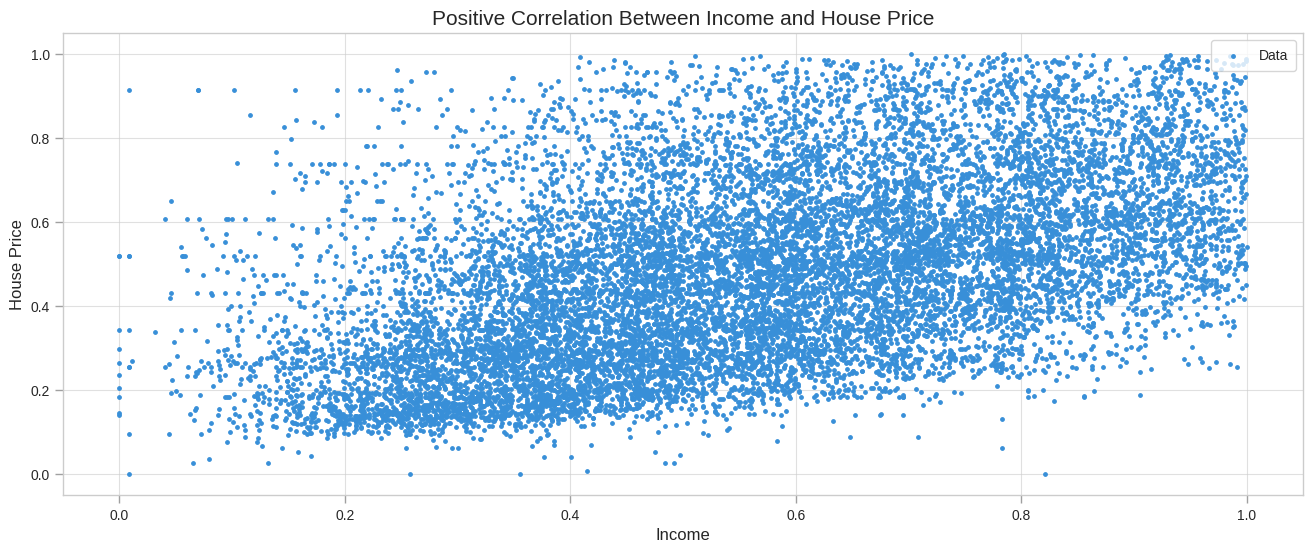

In [73]:
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
plt.style.use('seaborn-whitegrid')
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Positive Correlation Between Income and House Price', fontsize=15)
plt.xlabel('Income', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
plt.show()

**Resultado esperado (não precisa ser idêntico)**
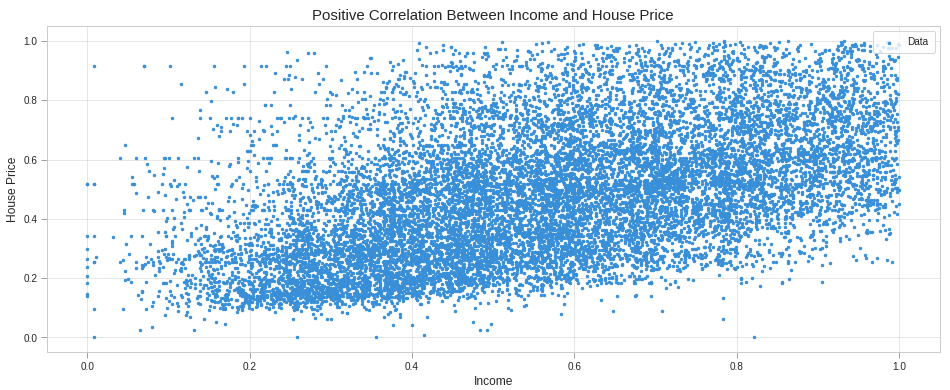

### **ToDo**: Discussão (10pt)

Por que os dados devem ser normalizados entre 0 e 1 ?

```
 fazemos isso para normalizar e  equilibrar caractesristicas distindas e tenham o mesmo valor no calculo

```

## Regressão com [*Scikit-learn*](https://scikit-learn.org/stable/) (20pt)

### Importando as bibliotecas e função para plotar gráficos

In [74]:
from sklearn.linear_model import LinearRegression

In [17]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):

    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.15)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regressao')
    plt.title(title, fontsize=14)
    plt.xlabel('Renda', fontsize=11)
    plt.ylabel('Preço', fontsize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()


### ToDo: Treine o modelo com o *LinearRegression* do Scikit-learn (10pt)

Repare que a matriz 'X' fornece as instâncias (nas linhas) e as características (nas colunas). Imprima as primeirs 5 instâncias para ter uma ideia da 'cara' dos dados. Imprima também o vetor 'y', referente à variável dependente. Observe que o skikit-learn espera sempre que os dados de entrada esteja no formato: (n_samples, n_features). Assim, pode ser preciso re-ajustar o shape.



In [82]:
X[:5],y[:5]
X = np.array(X).reshape(-1,1)

In [84]:
 reg = LinearRegression().fit(X,y)# ToDo: Implemente o treinamento. Ver documentação da função fit()

### ToDo: Predizendo os resultados (10pt)

In [85]:
y_pred_sci = reg.predict(X) # ToDo: ver documentação da função predict

### Plotando os resultados

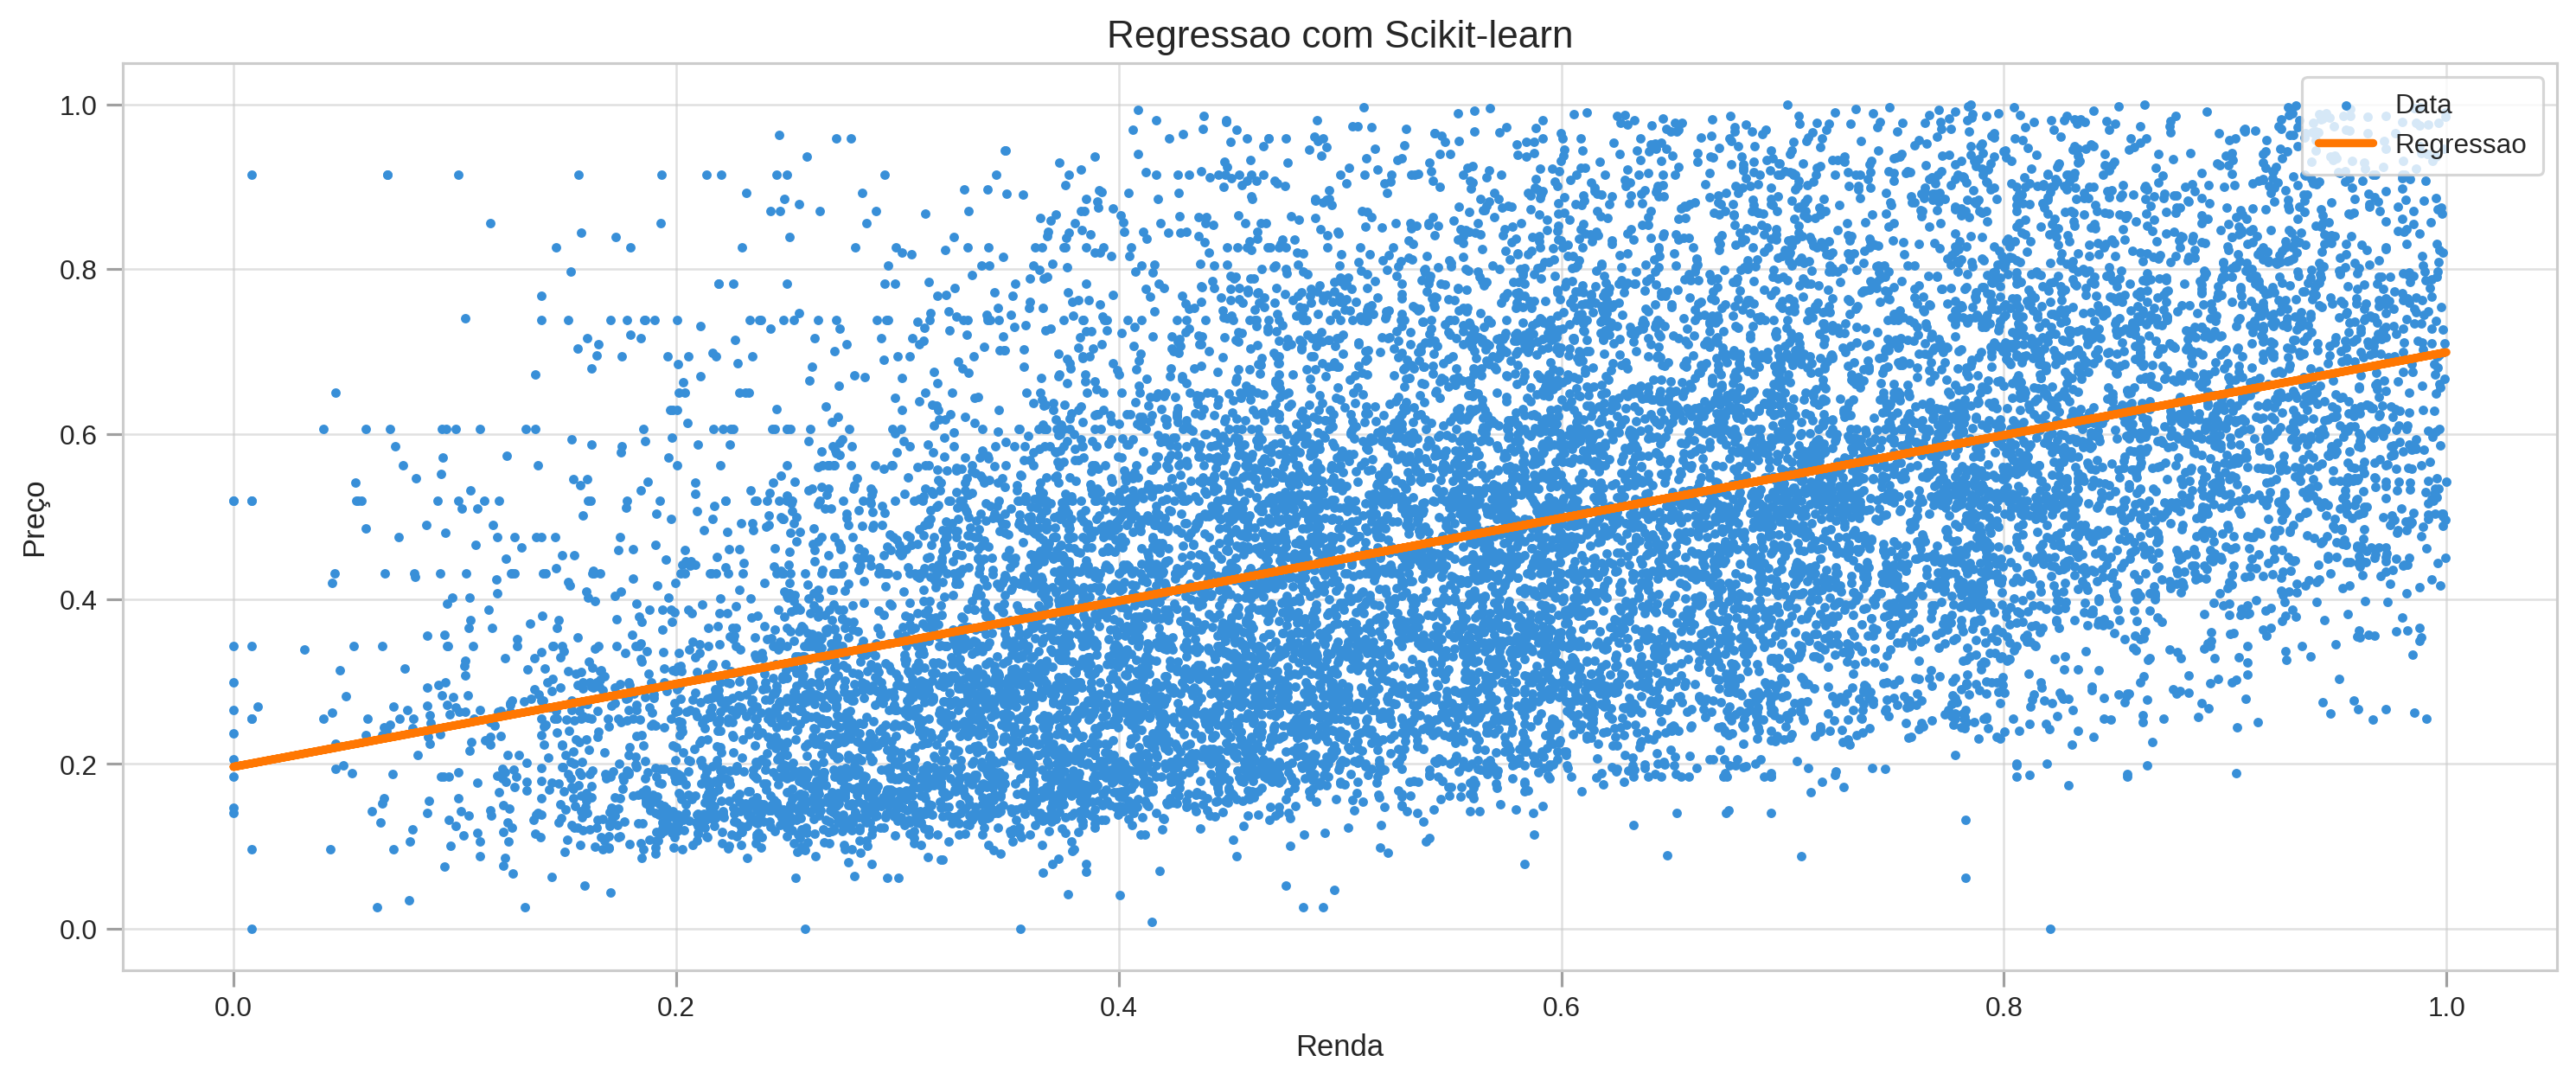

In [86]:
plot_regression(X, y, y_pred_sci, log=None, title="Regressao com Scikit-learn")

## Método próprio : Implementação da regressão com descida do gradiente (50pt)


Vamos abordar a resolução de uma regressão linear, na qual nosso modelo considerará apenas uma característica: MedInc. Isso significa que nosso vetor de pesos terá apenas uma dimensão.

O modelo que adotaremos é representado por uma equação linear simples, dada por: $Y = mX + b$. Ou seja, um modelo paramétrico, com dois parâmetros: $m$ e $b$.

Para otimizar nosso modelo, utilizaremos o erro quadrático médio (mean squared error - MSE) como função objetivo durante o processo de descida do gradiente. Em contextos de otimização, a função objetivo é aquela que desejamos otimizar, seja maximizando ou minimizando seu valor. No nosso caso, o objetivo é minimizar o erro, mais especificamente, o MSE. A definição matemática do MSE é dada pela seguinte equação:

![MSE](https://drive.google.com/uc?export=view&id=1XrK7UrWYdKk2iMgnDPmTMtYbpX44mULB)

Note que o MSE é uma função que depende de $Y$, que, por sua vez, é uma função dos parâmetros $m$ e $b$.

Se definirmos $\hat{y_i}$ como a saída prevista pelo nosso modelo treinado e $y_i$ como o valor real (ou rótulo) da instância $i$, podemos expandir a função MSE da seguinte forma:

![exp](https://drive.google.com/uc?export=view&id=1g_xl-nAjSpzBa-ee6k0rLX5xNF6QlQH-)

Para enfatizar que o MSE é uma função que depende dos parâmetros $m$ e $b$, vamos renomeá-lo como $f(m,b)$. Também é comum descrevermos como $f(x;m,b)$. No contexto de aprendizagem de máquina está função objetivo também é chamada de função de perda, função de custo ou do inglês *loss function* ($\mathscr{L}$).

Dado que a função $f$ é dependente de $m$ e $b$, é necessário calcular suas derivadas parciais em relação a esses parâmetros para atualizá-los durante a descida do gradiente. A derivada parcial em relação a $m$ é:

![derm](https://drive.google.com/uc?export=view&id=1UYon6FpnwGD3oLS9-Sx5tOunRBI1dagM)

E a derivada em relação a $b$ é:

![derb](https://drive.google.com/uc?export=view&id=1ukBveq7BRl7sV2NE__sXnminbpiRrQqd)


No contexto das redes neurais, objeto de estudo deste curso, é comum chamarmos os parâmetros de pesos, do inglês weights. Assim, é comum que a matriz de pesos apareça representada por $W$.

Como aplicar a descida do gradiente para otimizar os parâmetros do modelo:

A descida do gradiente é um algoritmo de otimização usado para minimizar funções de custo. No contexto acima, a descida do gradiente pode ser usada para otimizar os parâmetros $( m )$ (inclinação) e $( b )$ (interceptação). Aqui estão os passos para usar a descida do gradiente para otimizar esses parâmetros:

1. **Inicialização**:
   - Escolha valores iniciais para $( m )$ e $( b )$. Isso pode ser feito aleatoriamente ou com base em algum conhecimento prévio (dica: veja a documentação do [link](https://numpy.org/doc/1.16/reference/routines.random.html)).
   - Defina uma taxa de aprendizado ( learning rate - lr), que determina o tamanho dos passos que você dará em cada iteração.

2. **Calcule a Função de Custo**:
   - Para um conjunto de dados com $( n )$ pontos, a função de perda "mean squared error" é dada por:
     
     $[ f(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 ]$

     onde
     
     $( y_i )$ é o valor real e $( mx_i + b )$ é a previsão.

3. **Calcule os Gradientes**:
   - O gradiente da função de custo em relação a $( m )$ e $( b )$ pode ser calculado como:

     $[ \frac{\partial f}{\partial m} = \frac{-2}{n} \sum_{i=1}^{n} x_i(y_i - (mx_i + b)) ]$

     $[ \frac{\partial f}{\partial b} = \frac{-2}{n} \sum_{i=1}^{n} (y_i - (mx_i + b)) $]

4. **Atualize os Parâmetros**:
   - Atualize \( m \) e \( b \) usando as derivadas parciais calculadas:

     $[ m = m - \alpha \frac{\partial J}{\partial m} $]

     $[ b = b - \alpha \frac{\partial J}{\partial b} $]

      PS.: A subtração do gradiente do valor do parâmetro durante a atualização na descida do gradiente é uma consequência direta do objetivo do algoritmo: minimizar a função de custo.

      a. **Direção do Gradiente**:
        - O gradiente de uma função em um ponto específico indica a direção de maior aumento da função nesse ponto. Em outras palavras, ele aponta na direção da inclinação mais íngreme ascendente.
        
      b. **Objetivo de Minimização**:
        - Na descida do gradiente, nosso objetivo é minimizar a função de custo. Portanto, queremos mover na direção oposta à do gradiente, ou seja, na direção de maior descida.
        
      c. **Subtração vs. Adição**:
        - Se adicionássemos o gradiente ao valor do parâmetro, estaríamos movendo na direção de maior aumento da função de custo, o que é contraproducente ao nosso objetivo.
        - Ao subtrair o gradiente, movemo-nos na direção de maior descida, aproximando-nos do mínimo local da função de custo.

      d. **Intuição Geométrica**:
        - Imagine estar no topo de uma colina e querer chegar ao ponto mais baixo do vale. Se você seguir na direção da inclinação mais íngreme descendente (oposta à direção do gradiente), chegará ao vale mais rapidamente. Adicionar o gradiente seria como subir a colina, enquanto subtrair o gradiente é como descer a colina.


5. **Iteração**:
   - Repita os passos 2 a 4 até que a função de custo $\( f(m, b) \4) convirja para um valor mínimo ou até que um número máximo de iterações seja alcançado.



### **ToDo**: Função da descida do gradiente e para plotar a regressão (40pts)

Vamos criar uma função denominada `gradient_descent` seguindo os passos abaixo:

1. **Inicialização**: Defina os valores iniciais de `m` e `b` com números aleatórios no intervalo de 0 a 1.
2. **Iteração**: Repita o processo por um determinado número de épocas, referido como `epoch`.
3. **Cálculo e Atualização**:
   - Em cada época, compute o valor previsto usando os valores correntes de `m` e `b`.
   - Calcule o erro quadrático entre o valor previsto e o valor real $y$.
   - Atualize os valores de `m` e `b` movendo-se na direção oposta ao gradiente. A magnitude dessa atualização deve ser regulada por uma taxa de aprendizado, denominada *Learning Rate (lr)*.
4. **Registro**: Ao final de cada época, salve os valores correntes de `m`, `b` e o erro associado para análises posteriores.


In [87]:
def gradient_descent(X, y, lr=0.05, epoch=10):

    '''
    Descida do Gradiente
    '''

    m, b = np.random.rand(),np.random.rand() # ToDo : inicialize aleatoriamente entre 0 e 1

    log, mse_log = [], [] # listas para armazenar o processo de aprendizado
    N = len(X) # número de instâncias total do conjunto

    for e in range(epoch):

        predict = m*X + b # ToDo : propague (feed-forward) ara obter as predições : m*X + b
        MSE = np.mean((predict - y) ** 2) # ToDo : calcule o erro quadrático médio, conforme equação acima

        #compute a derivada
        dm = (-2 / N) * np.sum(X * (y - predict))
        db = (-2 / N) * np.sum(y - predict)

        # atualize m e b
        # ToDo : atualize m com base na equação acima. Lembre-se de ponderar pela taxa de aprendizado (lr)
        # ToDo : atualize b com base na equação acima. Lembre-se de ponderar pela taxa de aprendizado (lr)
        m -= lr * dm
        b -= lr * db

        # armazena para uso futuro
        log.append((m, b))
        mse_log.append(MSE)

    return m, b, log, mse_log

### Plotando os resultados

MSE: 0.03470266291118042


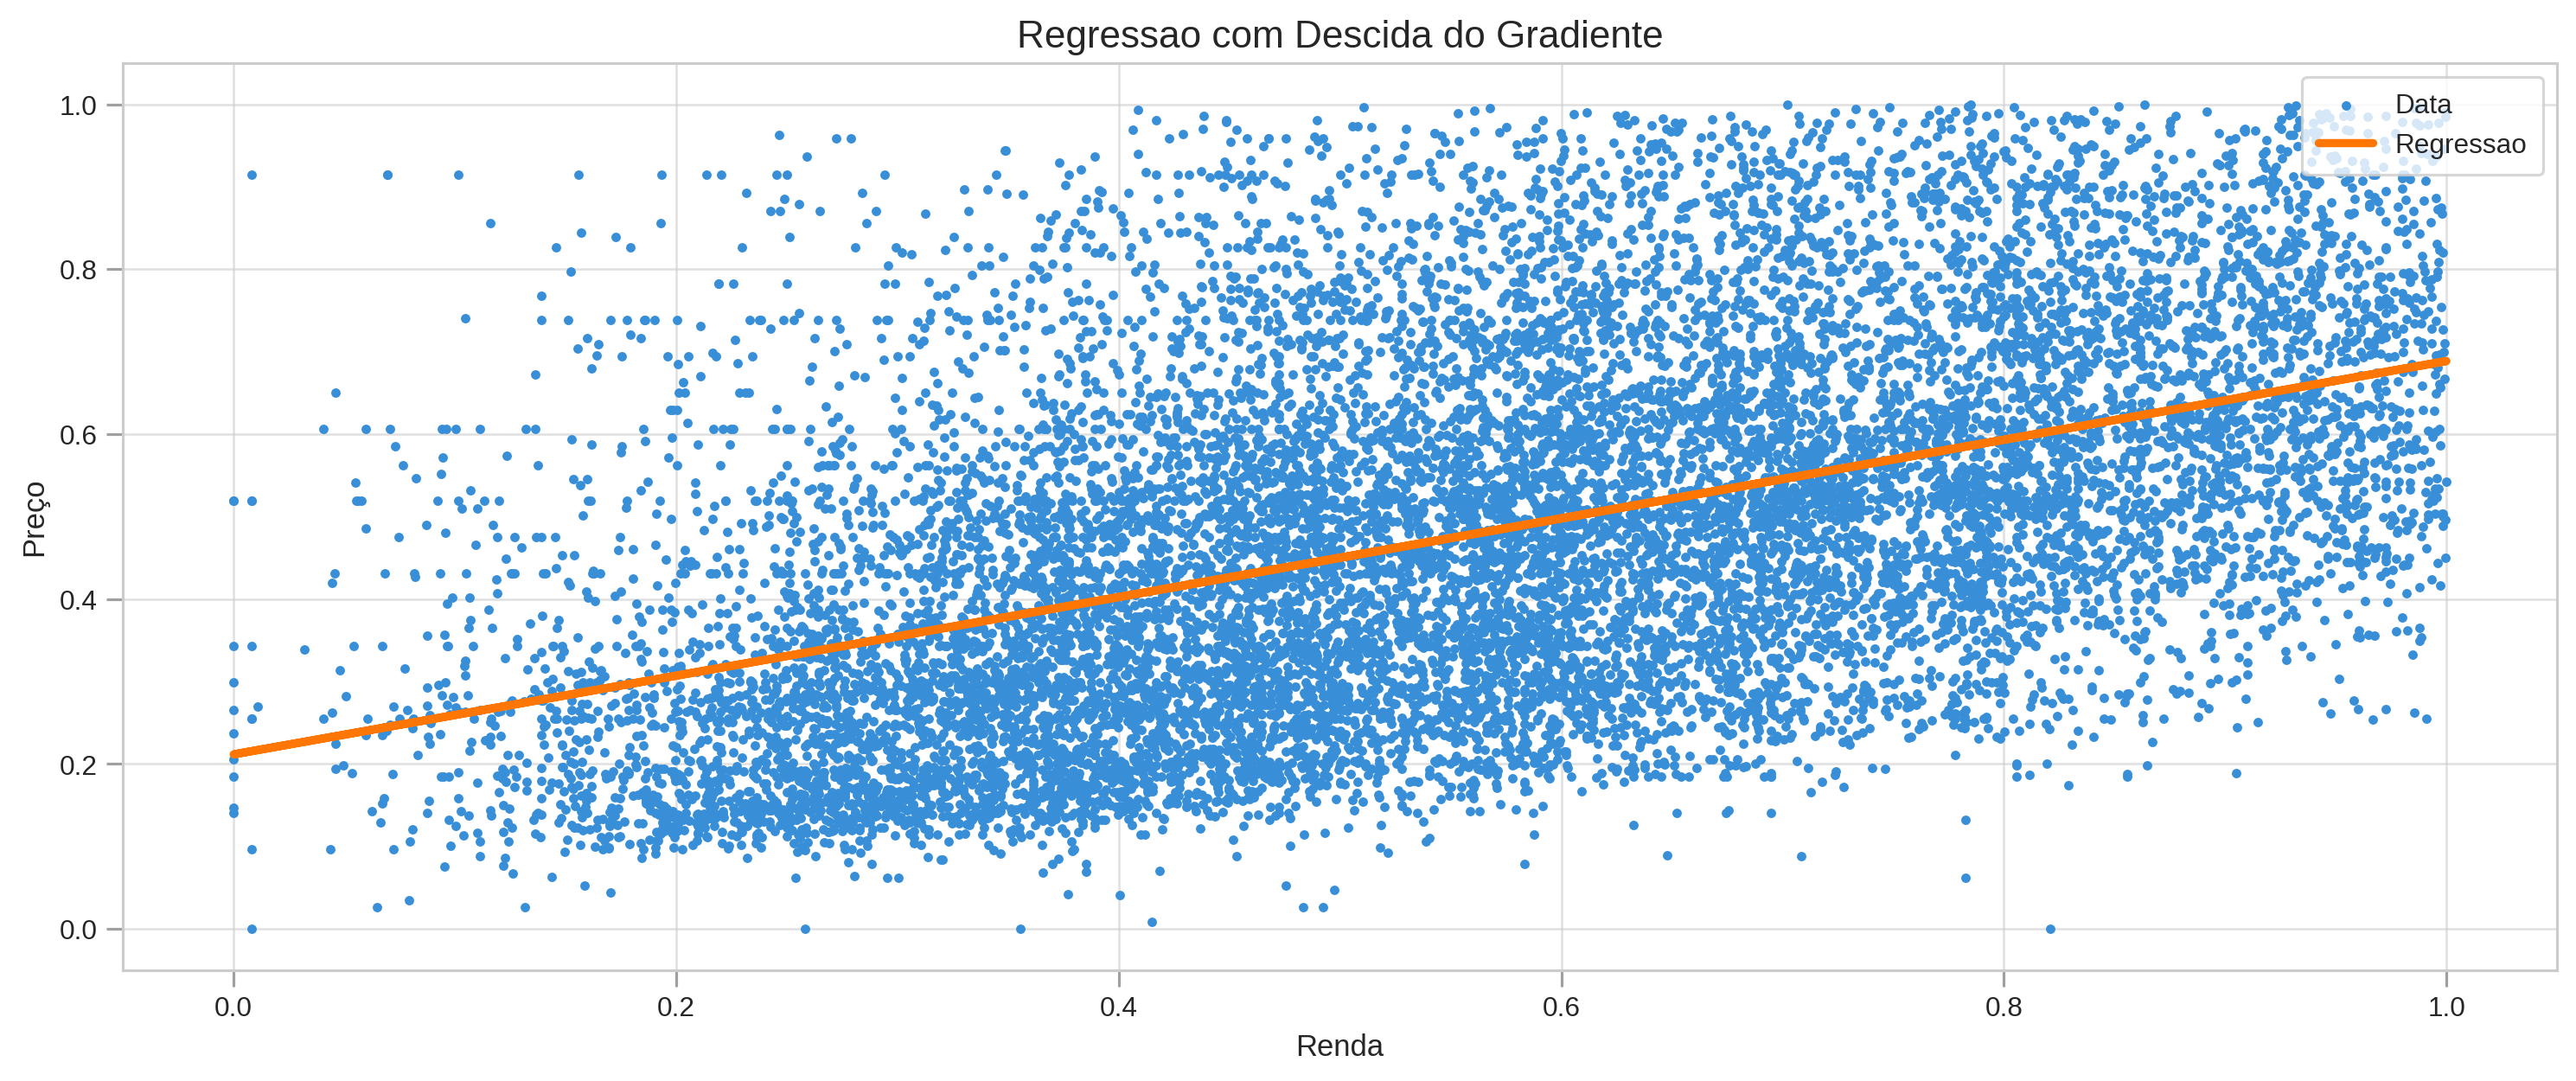

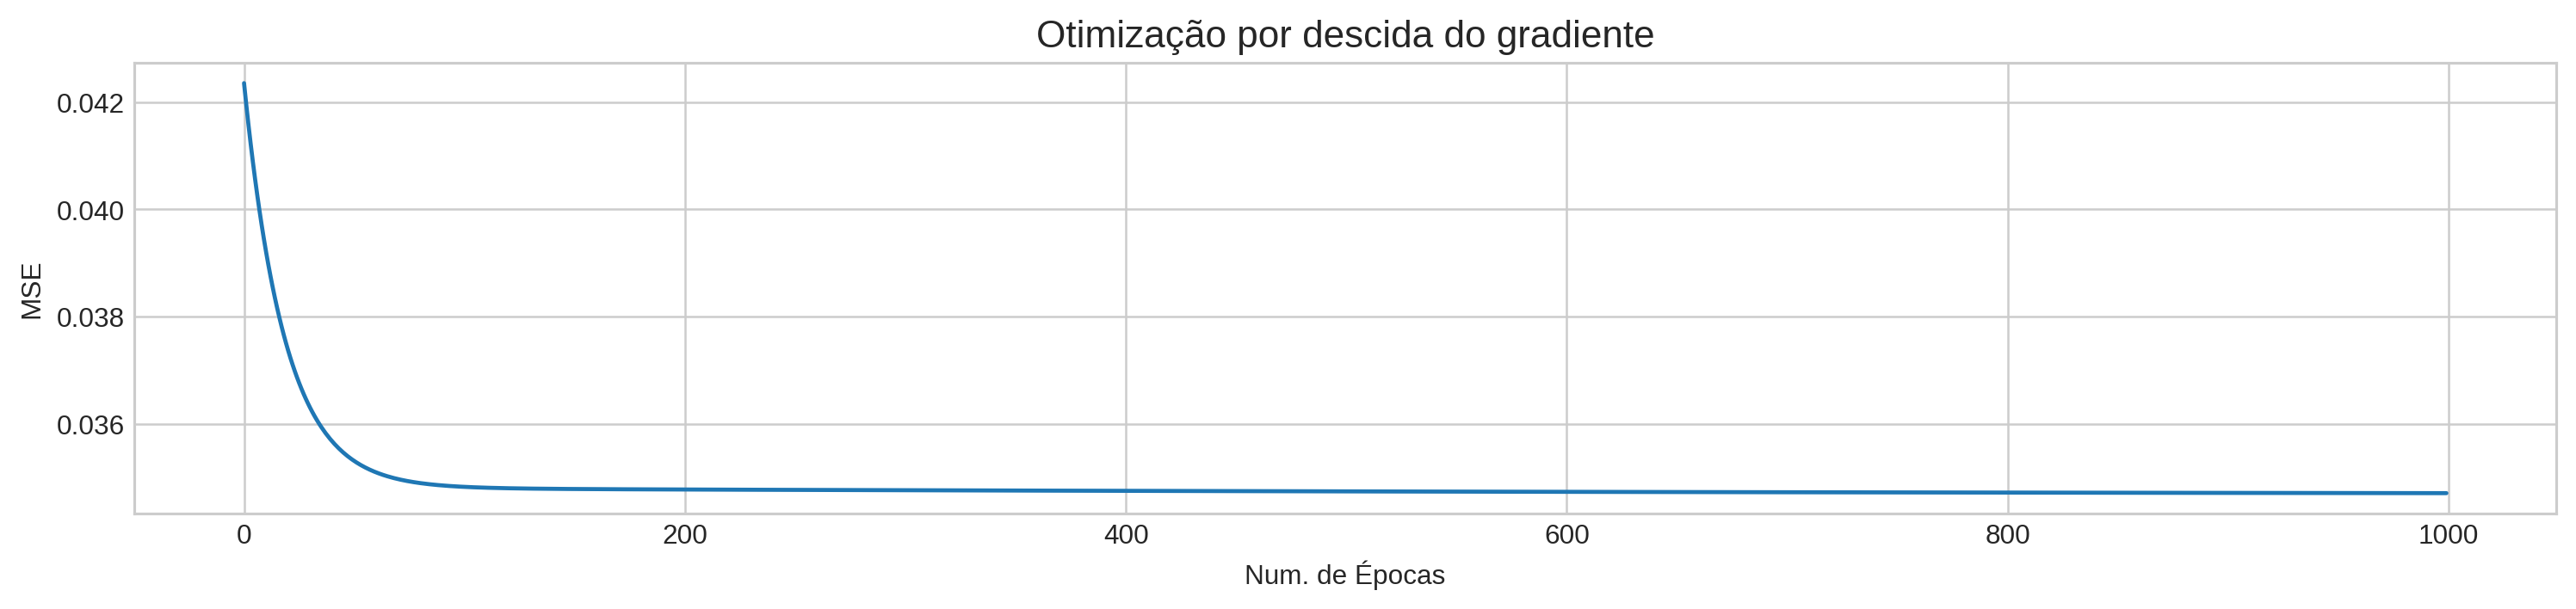

In [88]:
X = X.reshape(len(X))
m, b, log1, mse1 = gradient_descent(X, y, lr=0.01, epoch=1000)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=None, title="Regressao com Descida do Gradiente")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse1)), mse1)
plt.title('Otimização por descida do gradiente', fontsize=14)
plt.xlabel('Num. de Épocas')
plt.ylabel('MSE')
plt.show()

**Resultados esperados (não precisa ser idêntico)**

```MSE: 0.034740339862818236```

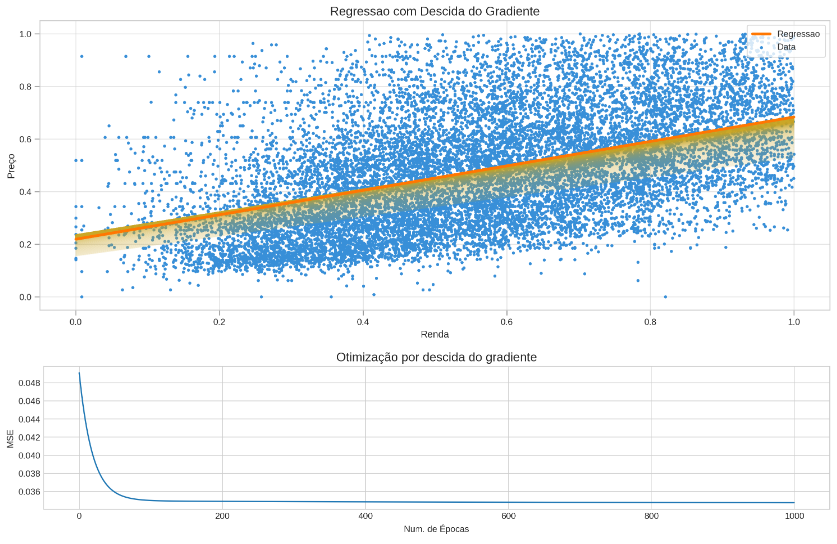

### **ToDo**: Discussão (10pt)

Use a função gradient_descent, para o conjunto de dados de casas ($X$ e $y$) carregados acima, com uma taxa de aprendizado de 0.01 por 1000 épocas. Analise as curvas plotadas. O que você pode dizer sobre as curvas?

```
  analisando o grafico e possivel ver que apos um certo numero de epocas o ritmo de aprendizagem se manteve estavel
  
```